In [90]:
import snscrape

In [91]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [92]:
##### TWEETS FROM THE POTUS BEFORE HOLDING THE OFFICE #######

In [93]:
query = "(from:JoeBiden) until:2021-01-01 since:2018-01-01"
tweets = []
limit = 1000

In [95]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

In [96]:
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

                         Date      User  \
0   2020-12-31 22:42:00+00:00  JoeBiden   
1   2020-12-31 21:52:00+00:00  JoeBiden   
2   2020-12-31 19:02:10+00:00  JoeBiden   
3   2020-12-31 01:40:00+00:00  JoeBiden   
4   2020-12-30 23:25:00+00:00  JoeBiden   
..                        ...       ...   
995 2020-11-03 23:36:00+00:00  JoeBiden   
996 2020-11-03 23:00:01+00:00  JoeBiden   
997 2020-11-03 22:28:36+00:00  JoeBiden   
998 2020-11-03 22:04:00+00:00  JoeBiden   
999 2020-11-03 21:31:00+00:00  JoeBiden   

                                                 Tweet  
0    The challenges we face as a nation will not di...  
1    We have less than one week to do everything in...  
2    Georgia — Today is your last chance to vote ea...  
3    The next few weeks and months are going to be ...  
4    With just over 20 days until Inauguration Day,...  
..                                                 ...  
995  As polls begin to close in certain parts of th...  
996  Folks, time is running

In [ ]:
df.to_csv('/Users/mukulkajla/Downloads/Twitter_POTUS.csv')

In [ ]:
##### TWEETS FROM THE POTUS AFTER STARTING THE OFFICE ######

In [ ]:
query_after = "(from:POTUS) since:2021-01-20"
tweets_after = []
limit = 1000

In [ ]:
for tweet in sntwitter.TwitterSearchScraper(query_after).get_items():
    if len(tweets_after) == limit:
        #print(len(tweets))
        break
    else:
        tweets_after.append([tweet.date, tweet.username, tweet.content])

In [ ]:
df_2 = pd.DataFrame(tweets_after, columns=['Date', 'User', 'Tweet'])
print(df_2)

                         Date   User  \
0   2022-04-27 14:34:44+00:00  POTUS   
1   2022-04-27 13:00:34+00:00  POTUS   
2   2022-04-27 13:00:34+00:00  POTUS   
3   2022-04-26 23:16:58+00:00  POTUS   
4   2022-04-26 21:03:00+00:00  POTUS   
..                        ...    ...   
995 2021-12-01 20:02:53+00:00  POTUS   
996 2021-12-01 18:04:04+00:00  POTUS   
997 2021-12-01 16:30:00+00:00  POTUS   
998 2021-12-01 15:30:43+00:00  POTUS   
999 2021-12-01 14:41:42+00:00  POTUS   

                                                 Tweet  
0    Since I took office, our economy has created 7...  
1    I’m grateful for the work of many across our g...  
2    Today, we welcome home Trevor Reed and celebra...  
3    Today, I granted pardons to three people and c...  
4    I had a great meeting with the Congressional H...  
..                                                 ...  
995  Tune in as I deliver remarks to commemorate Wo...  
996  Tune in as I deliver remarks on our work to st...  
997  I

In [ ]:
df_2.to_csv('/Users/mukulkajla/Downloads/Twitter_POTUS_After.csv')

In [ ]:
########## TOPIC MODELING ###########
######## BEFORE ELECTION ############

In [98]:
import os

In [99]:
papers_1 = pd.read_csv('/Users/mukulkajla/Downloads/Twitter_POTUS.csv')

In [100]:
papers_1.head()

,Unnamed: 0,Date,User,Tweet
0,0,2020-12-31 22:42:00+00:00,JoeBiden,The challenges we face as a nation will not di...
1,1,2020-12-31 21:52:00+00:00,JoeBiden,We have less than one week to do everything in...
2,2,2020-12-31 19:02:10+00:00,JoeBiden,Georgia — Today is your last chance to vote ea...
3,3,2020-12-31 01:40:00+00:00,JoeBiden,The next few weeks and months are going to be ...
4,4,2020-12-30 23:25:00+00:00,JoeBiden,"With just over 20 days until Inauguration Day,..."


In [105]:
papers_1 = papers_1.drop(columns=['Unnamed: 0', 'Date', 'User'], axis=1)

In [107]:
import re

In [109]:
from wordcloud import WordCloud

In [149]:
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=1000,width=1000, height=1000, contour_color='red')

In [130]:
papers_1['Tweet_processed'] = \
papers_1['Tweet'].map(lambda x: re.sub('[,\.!?]', '', x))


In [131]:
papers_1['Tweet_processed'] = \
papers_1['Tweet_processed'].map(lambda x: x.lower())


In [132]:
papers_1['Tweet_processed'].head()

0    the challenges we face as a nation will not di...
1    we have less than one week to do everything in...
2    georgia — today is your last chance to vote ea...
3    the next few weeks and months are going to be ...
4    with just over 20 days until inauguration day ...
Name: Tweet_processed, dtype: object

In [133]:
# Join the different processed titles together.
tweet_string = ','.join(list(papers_1['Tweet_processed'].values))

In [150]:
wordcloud.generate(tweet_string)

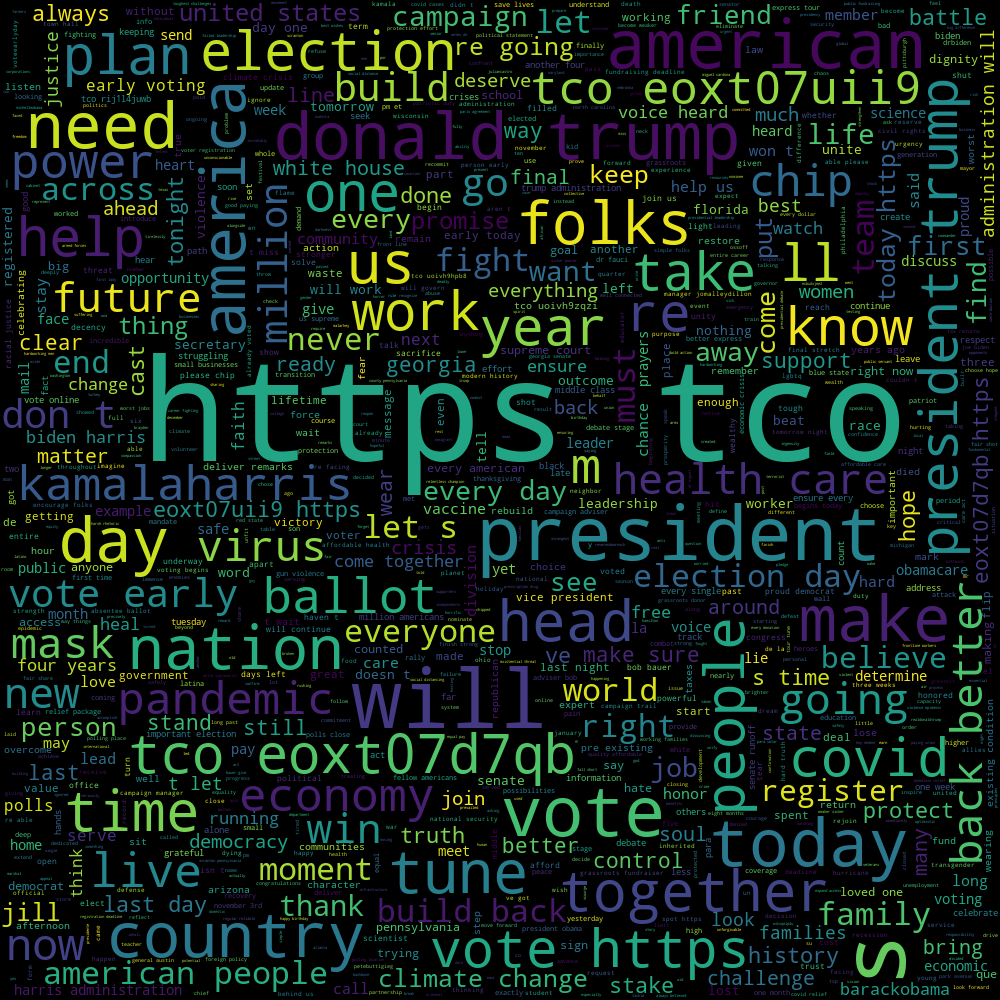

In [151]:
wordcloud.to_image()

In [153]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mukulkajla/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [154]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [155]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [156]:
data = papers_1.Tweet_processed.values.tolist()
data_words = list(sent_to_words(data))

In [157]:
data_words = remove_stopwords(data_words)

In [158]:
print(data_words[:1][0][:30])

['challenges', 'face', 'nation', 'disappear', 'overnight', 'look', 'forward', 'start', 'new', 'year', 'filled', 'fresh', 'hope', 'possibilities', 'better', 'days', 'come', 'year', 'pain', 'loss', 'let', 'us', 'unite', 'heal', 'rebuild']


In [159]:
import gensim.corpora as corpora

In [160]:
id2word = corpora.Dictionary(data_words)

In [222]:
print(id2word)

Dictionary(3796 unique tokens: ['better', 'challenges', 'come', 'days', 'disappear']...)


In [161]:
texts = data_words

In [162]:
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
###### CALCULATING TERM FREQUENCY ##########

In [163]:
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2)]


In [164]:
from pprint import pprint

In [310]:
num_topics = 10

In [311]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


In [312]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"tco" + 0.024*"https" + 0.013*"today" + 0.011*"day" + '
  '0.010*"president" + 0.010*"people" + 0.009*"vote" + 0.009*"make" + '
  '0.008*"americans" + 0.007*"care"'),
 (1,
  '0.036*"tco" + 0.036*"https" + 0.019*"vote" + 0.014*"today" + 0.011*"day" + '
  '0.011*"election" + 0.010*"get" + 0.008*"trump" + 0.008*"eoxt" + '
  '0.007*"president"'),
 (2,
  '0.027*"https" + 0.026*"tco" + 0.013*"president" + 0.012*"trump" + '
  '0.008*"donald" + 0.008*"time" + 0.008*"make" + 0.008*"country" + '
  '0.008*"america" + 0.006*"election"'),
 (3,
  '0.018*"tco" + 0.017*"https" + 0.012*"back" + 0.009*"going" + 0.008*"day" + '
  '0.007*"people" + 0.007*"help" + 0.006*"get" + 0.006*"better" + '
  '0.006*"every"'),
 (4,
  '0.049*"tco" + 0.049*"https" + 0.020*"vote" + 0.009*"make" + 0.008*"eoxt" + '
  '0.007*"trump" + 0.007*"election" + 0.007*"day" + 0.007*"today" + '
  '0.006*"us"'),
 (5,
  '0.040*"https" + 0.038*"tco" + 0.016*"president" + 0.010*"us" + '
  '0.009*"americans" + 0.008*"trump"

In [ ]:
######### ANALYZING LDA RESULT ##########

In [260]:
import pickle 
import pyLDAvis

In [268]:
import pyLDAvis.gensim_models as gensimviz

In [269]:
pyLDAvis.enable_notebook()

In [274]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))

In [275]:
LDAvis_data_filepath

'./ldavis_prepared_25'

In [313]:
if 1 == 1:
    LDAvis_prepared = gensimviz.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/Users/mukulkajla/Library/Python/3.8/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/mukulkajla/Library/Python/3.8/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/mukulkajla/Library/Python/3.8/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/mukulkajla/Library/Python/3.8/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/mukulk

In [314]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.041914 -0.027160       1        1  15.055133
9     -0.035826  0.016015       2        1  13.643819
4      0.063493 -0.011180       3        1  12.691748
0      0.028902  0.053985       4        1  11.509755
1      0.059928 -0.024332       5        1  10.785983
6      0.031790 -0.063267       6        1   8.530236
2     -0.023771  0.005407       7        1   7.792211
5     -0.022436 -0.028161       8        1   7.727502
3     -0.004930  0.110123       9        1   7.304143
7     -0.139065 -0.031429      10        1   4.959470, topic_info=          Term        Freq       Total Category  logprob  loglift
411  president  161.000000  161.000000  Default  30.0000  30.0000
62        vote  169.000000  169.000000  Default  29.0000  29.0000
35       https  601.000000  601.000000  Default  28.0000  28.0000
45         tco  602.000000  602.000000  Default  27.0000  27.0000
390       back   69.000000   69.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
480    america    2.782538   71.882836  Topic10  -5.6855  -0.2478
72    pandemic    2.361049   32.741920  Topic10  -5.8497   0.3743
11         let    2.491947   65.981078  Topic10  -5.7958  -0.2724
100       mask    2.250768   26.710346  Topic10  -5.8975   0.5301
22          us    2.400587   84.678815  Topic10  -5.8331  -0.5593

[822 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
523       1  0.151607        able
523       2  0.075803        able
523       3  0.151607        able
523       4  0.075803        able
523       5  0.151607        able
...     ...       ...         ...
2735      7  0.634657        zero
1848      7  0.634685         zhq
3242      9  0.638651        zkyo
2535      5  0.585215  zpuxqnviri
3768      6  0.621074          zz

[1891 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 5, 1, 2, 7, 3, 6, 4, 8])

In [278]:
########## TOPIC MODELING ###########
######## BEFORE ELECTION ############

In [279]:
papers_2 = pd.read_csv('/Users/mukulkajla/Downloads/Twitter_POTUS_After.csv')

In [280]:
papers_2 = papers_2.drop(columns=['Unnamed: 0', 'Date', 'User'], axis=1)

In [281]:
wordcloud_after = WordCloud(background_color="black", max_words=5000, contour_width=1000,width=1000, height=1000, contour_color='red')

In [282]:
papers_2['Tweet_processed'] = \
papers_2['Tweet'].map(lambda x: re.sub('[,\.!?]', '', x))

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
/var/folders/l_/bw553v210jz7fmxhw1r41k3w0000gn/T/ipykernel_33180/2963330942.py:2: DeprecationWarning: invalid escape sequence \.
  papers_2['Tweet'].map(lambda x: re.sub('[,\.!?]', '', x))


In [285]:
papers_2['Tweet_processed'] = \
papers_2['Tweet_processed'].map(lambda x: x.lower())

In [286]:
papers_2['Tweet_processed'].head()

0    since i took office our economy has created 79...
1    i’m grateful for the work of many across our g...
2    today we welcome home trevor reed and celebrat...
3    today i granted pardons to three people and co...
4    i had a great meeting with the congressional h...
Name: Tweet_processed, dtype: object

In [287]:
# Join the different processed titles together.
tweet_string_2 = ','.join(list(papers_2['Tweet_processed'].values))

In [289]:
wordcloud_after.generate(tweet_string_2)

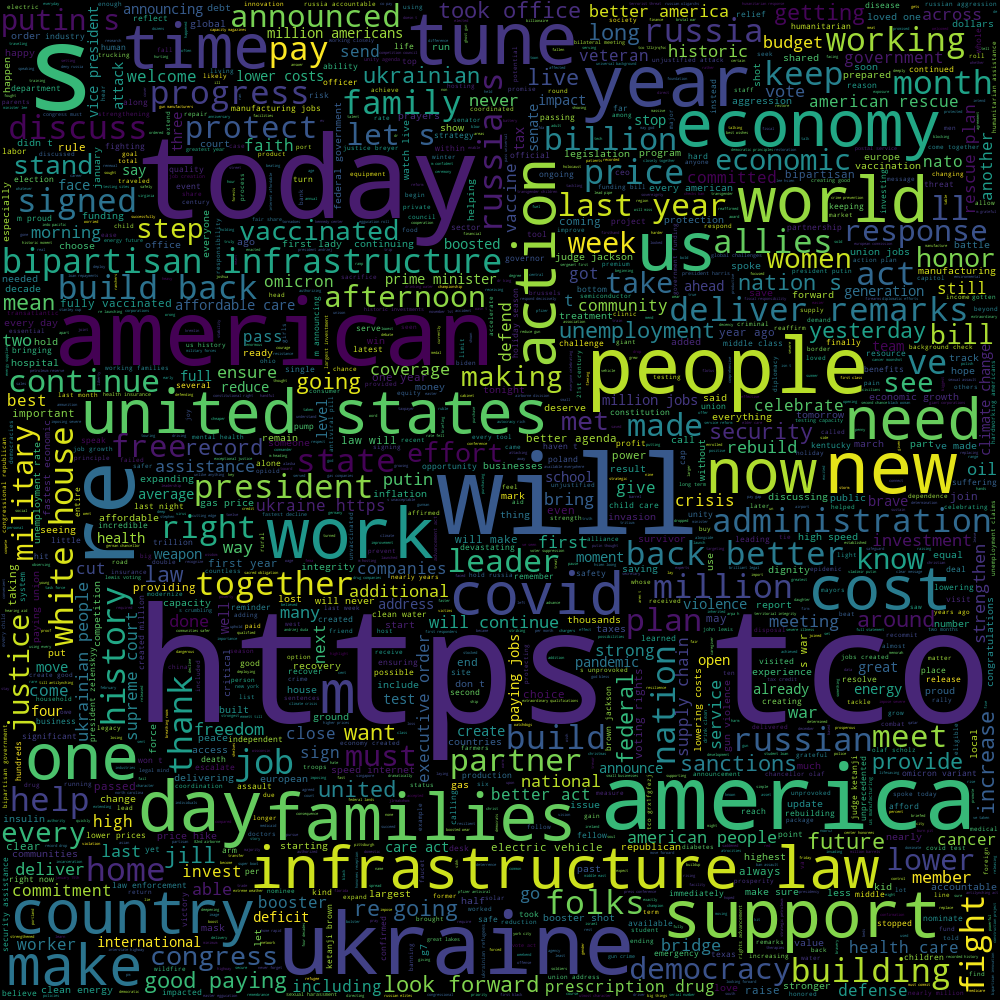

In [290]:
wordcloud.to_image()

In [315]:
def sent_to_words_after(sentences_after):
    for sentence in sentences_after:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [293]:
def remove_stopwords(texts_after):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts_after]

In [294]:
data_after = papers_2.Tweet_processed.values.tolist()
data_words_after = list(sent_to_words_after(data_after))

In [295]:
data_words_after = remove_stopwords(data_words_after)

In [296]:
print(data_words_after[:1][0][:30])

['since', 'took', 'office', 'economy', 'created', 'million', 'jobs', 'unemployment', 'dropped', 'historic', 'economy', 'gone', 'mend', 'move']


In [297]:
id2word_after = corpora.Dictionary(data_words_after)

In [298]:
print(id2word_after)

Dictionary(4361 unique tokens: ['created', 'dropped', 'economy', 'gone', 'historic']...)


In [299]:
texts_after = data_words_after

In [300]:
corpus_after = [id2word_after.doc2bow(text) for text in texts_after]

In [ ]:
######### CALCULATING TERM FREQUENCY FOR THE SECOND DATASET #############

In [301]:
print(corpus_after[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [318]:
lda_model_after = gensim.models.LdaMulticore(corpus=corpus_after,
                                       id2word=id2word_after,
                                       num_topics=num_topics)

In [319]:
pprint(lda_model_after.print_topics())
doc_lda_after = lda_model_after[corpus_after]

[(0,
  '0.011*"america" + 0.011*"https" + 0.010*"tco" + 0.007*"people" + '
  '0.007*"today" + 0.006*"american" + 0.006*"americans" + 0.006*"act" + '
  '0.005*"back" + 0.005*"infrastructure"'),
 (1,
  '0.017*"https" + 0.016*"tco" + 0.009*"today" + 0.007*"american" + '
  '0.006*"new" + 0.006*"russia" + 0.006*"tune" + 0.006*"government" + '
  '0.006*"america" + 0.005*"ukraine"'),
 (2,
  '0.009*"https" + 0.009*"tco" + 0.009*"people" + 0.006*"american" + '
  '0.006*"one" + 0.006*"democracy" + 0.005*"president" + 0.004*"today" + '
  '0.004*"gun" + 0.004*"deliver"'),
 (3,
  '0.018*"tco" + 0.017*"https" + 0.011*"infrastructure" + 0.011*"america" + '
  '0.009*"jobs" + 0.008*"today" + 0.008*"law" + 0.007*"bipartisan" + '
  '0.007*"economy" + 0.007*"us"'),
 (4,
  '0.021*"tco" + 0.021*"https" + 0.009*"today" + 0.006*"russia" + '
  '0.006*"america" + 0.005*"americans" + 0.005*"ukraine" + 0.004*"united" + '
  '0.004*"states" + 0.004*"president"'),
 (5,
  '0.015*"tco" + 0.015*"get" + 0.014*"https" + 

In [ ]:
########### ANALYZING LDA RESULT ###########

In [305]:
LDAvis_data_filepath_after = os.path.join('./ldavis_prepared_after_'+str(num_topics))

In [306]:
LDAvis_data_filepath_after

'./ldavis_prepared_after_25'

In [320]:
if 1 == 1:
    LDAvis_prepared_after = gensimviz.prepare(lda_model_after, corpus_after, id2word_after)
    with open(LDAvis_data_filepath_after, 'wb') as f:
        pickle.dump(LDAvis_prepared_after, f)

/Users/mukulkajla/Library/Python/3.8/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [321]:
LDAvis_prepared_after

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.015380  0.007195       1        1  15.469441
8      0.043963  0.011677       2        1  13.021518
3      0.033457 -0.054864       3        1  12.759028
9      0.029757  0.022413       4        1  12.123907
6      0.012948  0.017843       5        1  10.791665
0      0.008309 -0.098296       6        1   8.210477
4     -0.009571  0.083695       7        1   7.493482
1      0.007365  0.033460       8        1   7.421202
2     -0.140549 -0.011904       9        1   6.484058
7     -0.001057 -0.011219      10        1   6.225222, topic_info=               Term        Freq       Total Category  logprob  loglift
81   infrastructure   60.000000   60.000000  Default  30.0000  30.0000
248            tune   63.000000   63.000000  Default  29.0000  29.0000
56            https  365.000000  365.000000  Default  28.0000  28.0000
65              tco  365.000000  365.000000  Default  27.0000  27.0000
422             get   91.000000   91.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
48            today    4.919011  177.119779  Topic10  -5.5289  -0.8072
149         deliver    3.731752   51.643696  Topic10  -5.8051   0.1491
798            plan    3.518212   39.044769  Topic10  -5.8641   0.3698
102            make    3.605885   56.092982  Topic10  -5.8394   0.0321
512          russia    3.605746   79.039271  Topic10  -5.8395  -0.3109

[824 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
621       1  0.135798      ability
621       3  0.271596      ability
621       4  0.407394      ability
621       7  0.135798      ability
3756      8  0.645324      academy
...     ...       ...          ...
474       5  0.600036     ywyxxiod
3371      7  0.648884    yzbqwspol
2422      8  0.645325  zelenskyyua
3442      8  0.645324   zsinbttvhq
4083      5  0.600025       zxshpz

[2078 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 4, 10, 7, 1, 5, 2, 3, 8])

In [325]:
print(lda_model.print_topic(topicno=1))

0.036*"tco" + 0.036*"https" + 0.019*"vote" + 0.014*"today" + 0.011*"day" + 0.011*"election" + 0.010*"get" + 0.008*"trump" + 0.008*"eoxt" + 0.007*"president"
